# Load and Combine All Text Files
Reads all 6 Game of Thrones book files and combines them into one big string

In [7]:
file_paths = [
    "/kaggle/input/game-of-thrones-books/001ssb.txt",
    "/kaggle/input/game-of-thrones-books/002ssb.txt",
    "/kaggle/input/game-of-thrones-books/003ssb.txt",
    "/kaggle/input/game-of-thrones-books/004ssb.txt",
    "/kaggle/input/game-of-thrones-books/005ssb.txt"
]

# Read all texts using encoding that handles special characters
all_text = ""
for file_path in file_paths:
    with open(file_path, "r", encoding="ISO-8859-1") as f:
        all_text += f.read() + " "

print("Total characters:", len(all_text))


Total characters: 9778338


# Preprocessing
Converts text to lowercase, removes punctuation, and splits it into words (tokens)

In [8]:

import re
import string
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Lowercase
text = all_text.lower()

# Remove punctuation
text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)

# Tokenization
tokens = word_tokenize(text)
print("Total tokens:", len(tokens))
print("Sample tokens:", tokens[:20])


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Total tokens: 1781488
Sample tokens: ['a', 'game', 'of', 'thrones', 'book', 'one', 'of', 'a', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'r', 'r', 'martin', 'prologue', 'we']


# One-Hot Encoding (first 20 words)
Converts the first 20 words into one-hot encoded vectors (binary format for each word)


In [9]:

from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

sample_tokens = tokens[:20]

le = LabelEncoder()
int_encoded = le.fit_transform(sample_tokens)
onehot_encoded = to_categorical(int_encoded)

print("Words:", sample_tokens)
print("One-Hot Vector Shape:", onehot_encoded.shape)


2025-06-26 11:16:16.179625: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750936576.442661      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750936576.519748      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Words: ['a', 'game', 'of', 'thrones', 'book', 'one', 'of', 'a', 'song', 'of', 'ice', 'and', 'fire', 'by', 'george', 'r', 'r', 'martin', 'prologue', 'we']
One-Hot Vector Shape: (20, 16)


# Bag of Words
Counts how many times each word appears in the full text (BoW model)

In [10]:

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform([text])

print("BoW Shape:", bow_matrix.shape)


BoW Shape: (1, 26472)


# N-Grams (Unigrams, Bigrams, Trigrams)
Extracts single words (unigrams), two-word combinations (bigrams), and three-word combos (trigrams)

In [11]:

ngram_vectorizer = CountVectorizer(ngram_range=(1, 3))
ngram_matrix = ngram_vectorizer.fit_transform([text])

print("N-Gram Shape:", ngram_matrix.shape)


N-Gram Shape: (1, 1770845)


# TF-IDF
Calculates importance of words using TF-IDF (gives lower weight to common words like “the”)

In [12]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([text])

print("TF-IDF Shape:", tfidf_matrix.shape)

TF-IDF Shape: (1, 26472)


# Word2Vec
Trains a Word2Vec model to create word embeddings (vector meanings of words)

In [13]:

from gensim.models import Word2Vec

# Word2Vec expects a list of list of tokens
model = Word2Vec([tokens], vector_size=100, window=5, min_count=2)

# Check vector of a sample word
word = 'snow'
if word in model.wv:
    print(f"Vector for '{word}':", model.wv[word][:10])  # first 10 dimensions
else:
    print(f"'{word}' not in vocabulary")


Vector for 'snow': [-0.06246263  0.06959118 -0.00518512 -0.01772377 -0.01366557 -0.12285052
  0.04761711  0.09254893 -0.06831098 -0.0614342 ]


# Visualization with PCA
Reduces the 100-dimensional word vectors to 2D using PCA and plots them on a graph

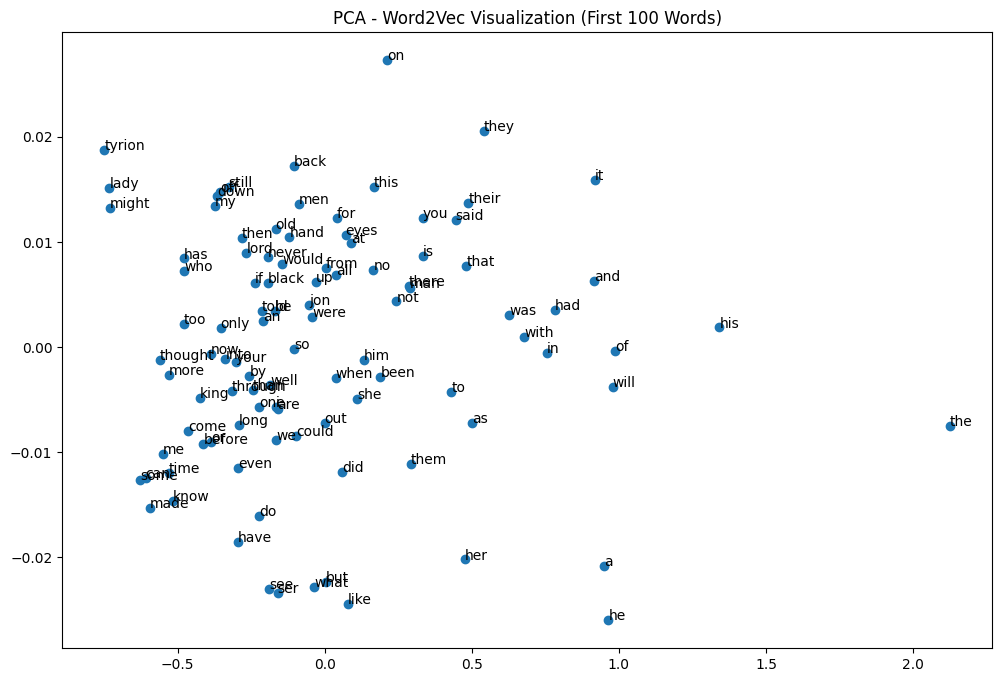

In [14]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)[:100]
word_vectors = [model.wv[word] for word in words]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (pca_result[i, 0], pca_result[i, 1]))

plt.title("PCA - Word2Vec Visualization (First 100 Words)")
plt.show()
